# Data Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stations_df = pd.DataFrame()
rides_df = pd.DataFrame()

for year in range(2014, 2020):
    # stations count
    stations_file_path = f'data/{year}/Stations_{year}.csv'
    stations_count = len(pd.read_csv(stations_file_path))
    stations_df = pd.concat([stations_df, pd.DataFrame({'year': [year], 'count': [stations_count]})])
    # ride counts per month
    for month in range(4, 11):
        rides_file_path = f'data/{year}/OD_{year}-{month:02d}.csv'
        rides_count = len(pd.read_csv(rides_file_path))
        rides_df = pd.concat([rides_df, pd.DataFrame({'month': [pd.to_datetime(f'{year}-{month:02d}-01')], 'count': [rides_count]})])
        
for year in range(2020, 2022):
    # stations count
    rides_file_path = f'data/{year}/OD_{year}.csv'    
    stations_count = len(pd.read_csv(stations_file_path))
    stations_df = pd.concat([stations_df, pd.DataFrame({'year': [year], 'count': [stations_count]})])
    # ride counts per month
    stations_file_path = f'data/{year}/Stations_{year}.csv'
    rides_counts = pd.read_csv(rides_file_path, parse_dates=[0, 2])
    rides_counts['count'] = 1
    rides_counts = rides_counts.groupby(pd.Grouper(key='start_date', freq='M'))['count'].sum()
    rides_counts = rides_counts.to_frame().reset_index()
    # set day to first of month
    def reset_day(year, month):
        return pd.to_datetime(f'{year}-{month}-01')
    rides_counts['start_date'] = rides_counts['start_date'].dt.month.apply(lambda m: reset_day(year, m))
    rides_counts = rides_counts.rename(columns={'start_date': 'month'})
    rides_df = pd.concat([rides_df, rides_counts])

/tmp/ipykernel_8120/1882022662.py:12: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  rides_count = len(pd.read_csv(rides_file_path))


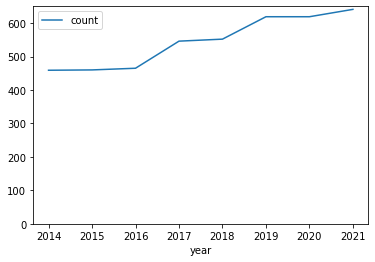

In [3]:
fig, ax = plt.subplots()

stations_df.plot(
    kind='line',
    x='year',
    y='count',
    ylim=[0, 650],
    ax=ax
)

plt.show()

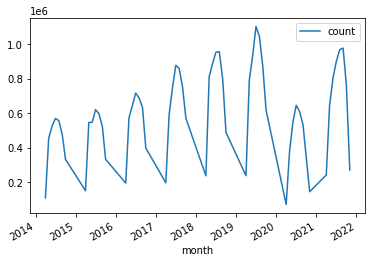

In [4]:
rides_df.plot(
    kind='line',
    x='month',
    y='count'
)

plt.show()